In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
from utils.jupyter_utils import get_perclass_count, get_tail_info

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 50})
# Set default figure size.
plt.rcParams['figure.figsize'] = (40, 20)

def plot_bar(height, title, xlabel, ylabel, log_scale=False, mean=None, barcolor="#43C528",
             yticks=[10, 100, 300, 500, 1000, 2000, 5000]):

    fig, ax = plt.subplots()

    # Save the chart so we can loop through the bars below.
    bars = ax.bar(
        x=np.arange(len(height)),
        height=height,
        tick_label=["" for _ in height],
        color=barcolor,
    )

    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False, labelsize=30)
#     plt.xticks(rotation = 90)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    if log_scale:
        ax.set_yscale('log')
    
    if mean:
        ax.axhline(mean, color='g')
    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    yticks = np.array([min(height)] + yticks + [max(height)])
    ax.set_yticks(yticks, minor=False)
    ax.set_yticklabels(yticks, size=40)
    ax.set_xlabel(xlabel, labelpad=15, color='#333333', size=34)
    ax.set_ylabel(ylabel, labelpad=15, color='#333333', size=34)
    ax.set_title(title, pad=15, color='#333333', weight='bold')

    fig.tight_layout()
    plt.show()

In [3]:
def plot_curves(d, title=None, xlabel=None, ylabel=None, log_scale=False, barcolor="#43C528", linewidth=6,
                yticks=[]):
    fig, ax = plt.subplots()
    
    for k in d:
        ax.plot(d[k], label=k, linewidth=linewidth)
    ax.set_title(title, pad=15, color='#333333', weight='bold')
    ax.set_xlabel(xlabel, labelpad=15, color='#333333', size=34)
    ax.set_ylabel(ylabel, labelpad=15, color='#333333', size=34)
    if log_scale:
        ax.set_yscale('log')
    plt.legend()
    yticks = np.array([min([min(d[k]) for k in d])] + yticks + [max([max(d[k]) for k in d])])
    ax.set_yticks(yticks, minor=False)
    ax.set_yticklabels(yticks, size=40)
    ax.set_xlabel(xlabel, labelpad=15, color='#333333', size=34)
    ax.set_ylabel(ylabel, labelpad=15, color='#333333', size=34)
    ax.set_title(title, pad=15, color='#333333', weight='bold')
    fig.tight_layout()
    plt.show()

In [4]:
inat_count = get_perclass_count(dataset='inat',
                                index_dir='indexes/',
                                index_name='default')

Number of classes: 810
Unlabeled 69384
Train 14620
Val 7332
Test 13771
Unlabeled (min)15
Train (min)3
Val (min)3
Unlabeled (max)250
Train (max)52
Val (max)26


In [7]:
tail_class_count, tail_sample_count = get_tail_info(dataset='inat',
                                                    index_dir='indexes/',
                                                    index_name='default',
                                                    threshold=18)

Classes < 18 images: 411
Samples to lift = 2185 images


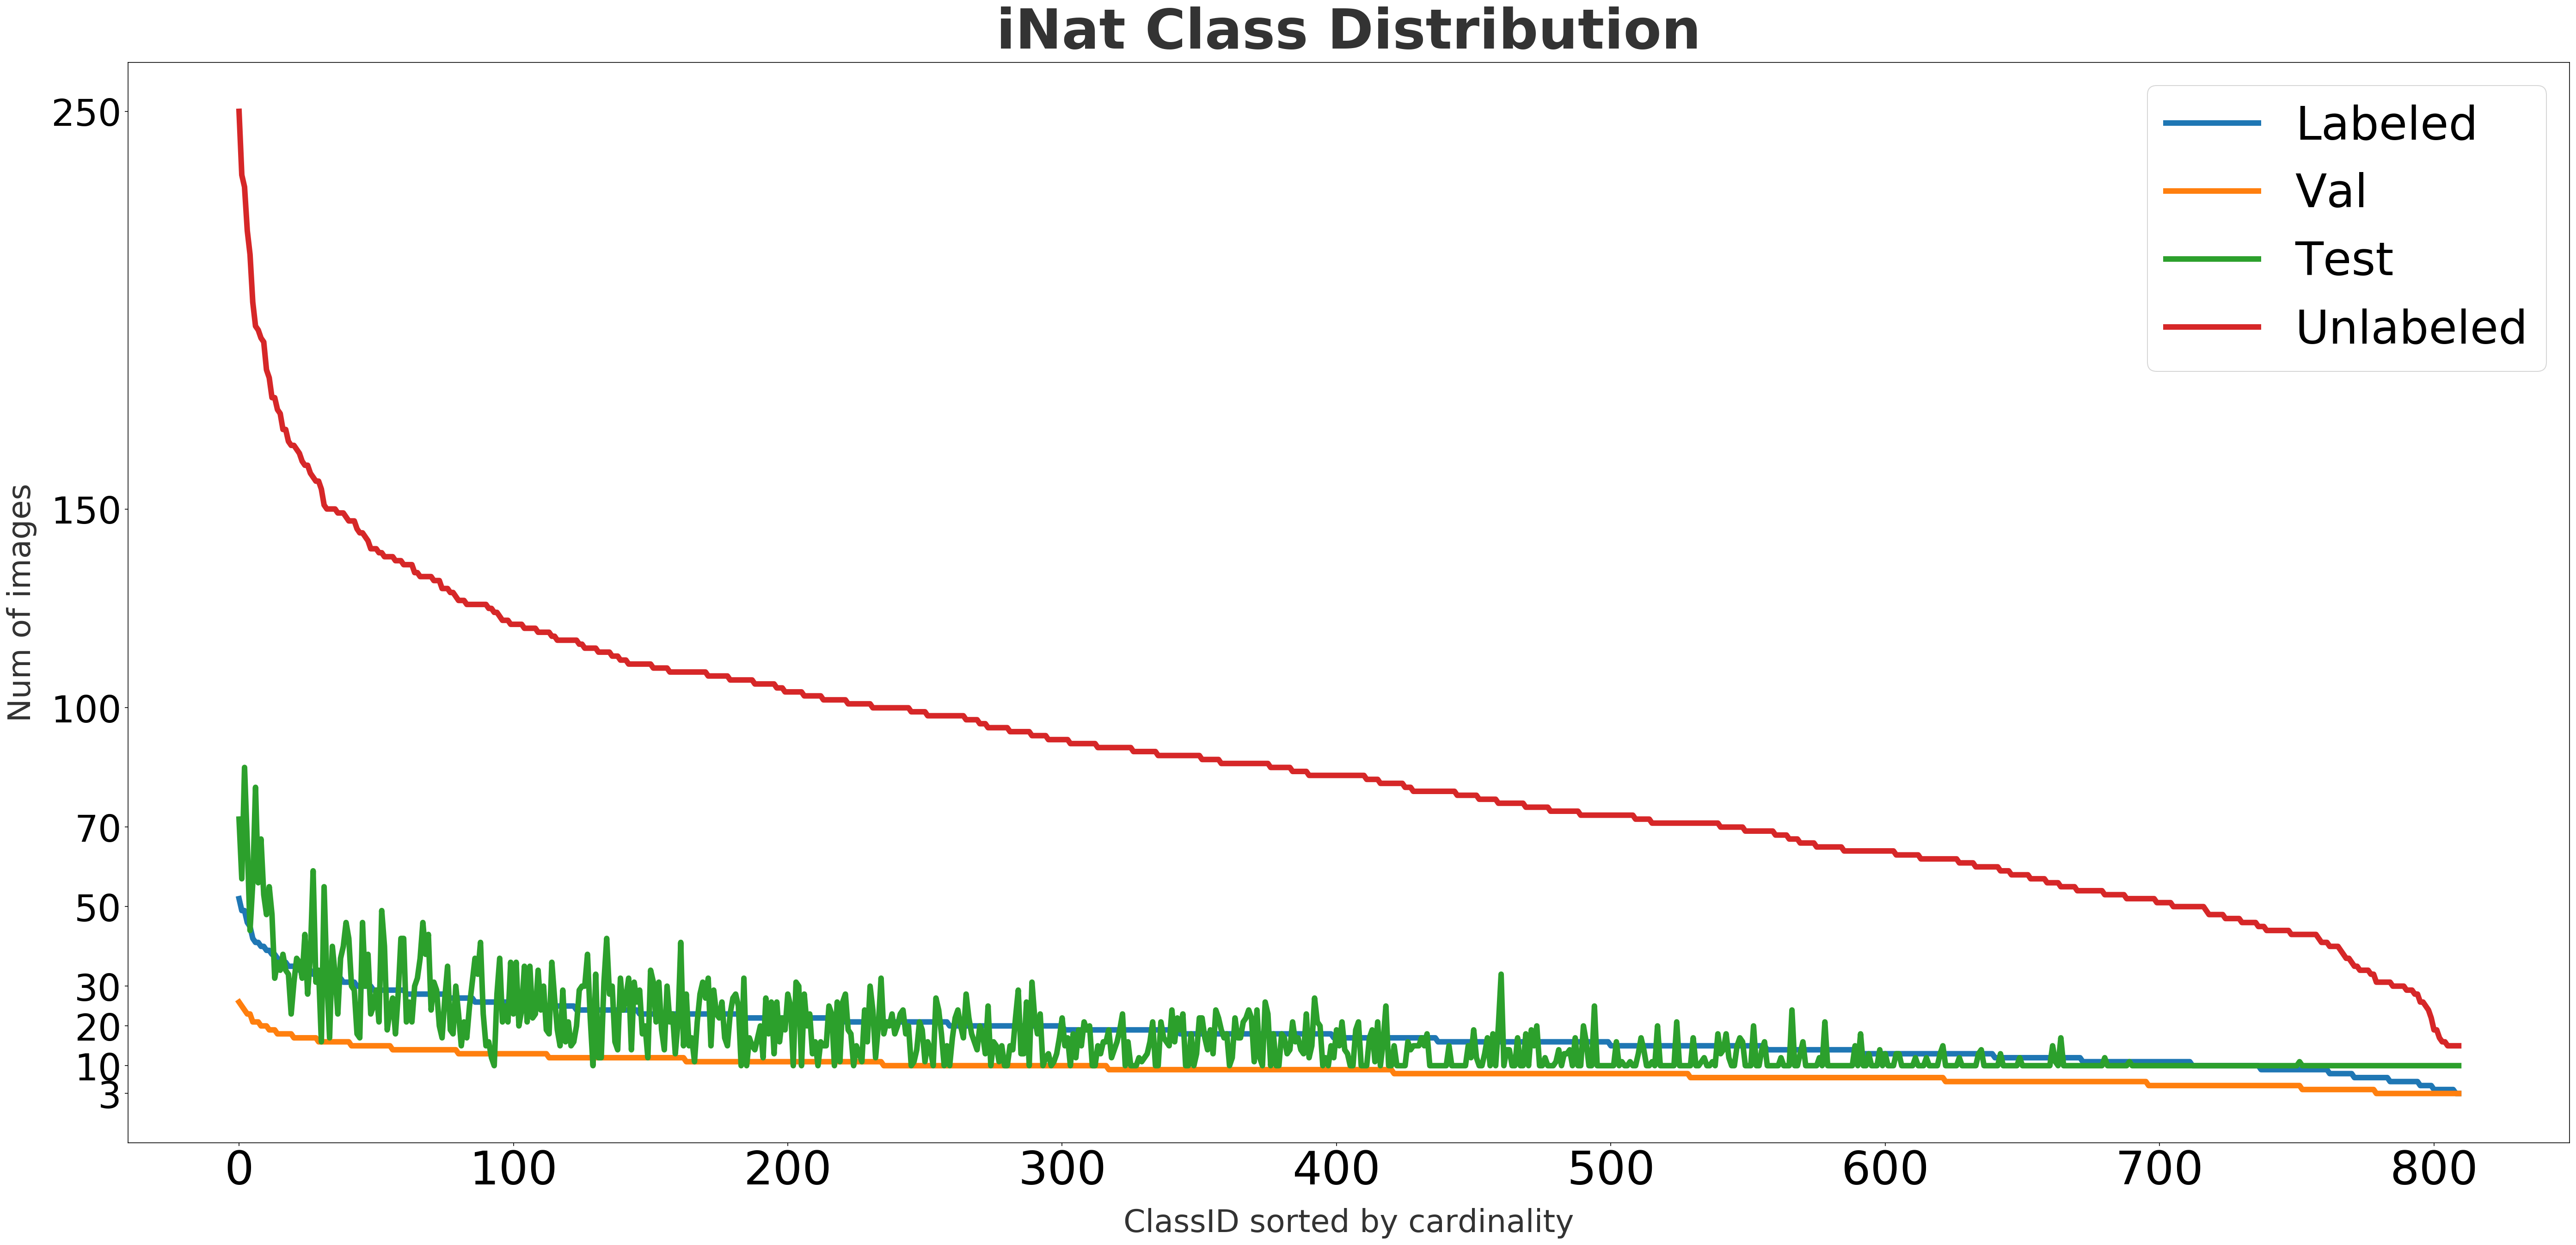

In [6]:
plot_curves({
    'Labeled' : inat_count['train'],
    'Val' : inat_count['val'],
    'Test' : inat_count['test'],
    'Unlabeled' : inat_count['unlabeled']
}, "iNat Class Distribution", "ClassID sorted by cardinality", "Num of images",  log_scale=False, barcolor="#43C528",
yticks=[10, 20, 30, 50, 70, 100, 150])

In [ ]:
# plot_bar(semi_inat_count['train'], "Train Set", "ClassID sorted by cardinality", "Num of images", log_scale=True, barcolor="#43C528",
#          yticks=[10, 30, 50, 70, 100])

In [ ]:
imagenet127_count = get_perclass_count(dataset='imagenet127',
                                     index_dir='indexes/',
                                     index_name='default')

In [ ]:
tail_class_count, tail_sample_count = get_tail_info(dataset='imagenet127',
                                                    index_dir='indexes/',
                                                    index_name='default',
                                                    threshold=150)

In [ ]:
plot_curves({
    'Labeled' : imagenet127_count['train'],
    'Val' : imagenet127_count['val'],
    'Test' : imagenet127_count['test'],
    'Unlabeled' : imagenet127_count['unlabeled']
}, "ImageNet127 Class Distribution", "ClassID sorted by cardinality", "Num of images",  log_scale=True, barcolor="#43C528",
yticks=[78, 872, 10000, 30000, 50000, 100000, 150000, 200000])

In [ ]:
# after lifting the tail
semi_inat_count_lift_tail = get_perclass_count(dataset='semi_inat',
                                               index_dir='indexes/',
                                               index_name='default_lift_tail',
                                               verbose=False)
semi_inat_count_lift_random = get_perclass_count(dataset='semi_inat',
                                                 index_dir='indexes/',
                                                 index_name='default_lift_random',
                                                 verbose=False)
plot_curves({
    'Lift Tail' : semi_inat_count_lift_tail['train'],
    'Original' : semi_inat_count['train'],
    'Lift Random' : semi_inat_count_lift_random['train'],
}, "Semi-iNat Class Distribution", "ClassID sorted by cardinality", "Num of images",  log_scale=True, barcolor="#43C528",
yticks=[10, 20, 30, 50, 70, 100])

In [ ]:
imagenet127_count_lift_tail = get_perclass_count(dataset='imagenet127',
                                                 index_dir='indexes/',
                                                 index_name='default_lift_tail',
                                                 verbose=False)
imagenet127_count_lift_random = get_perclass_count(dataset='imagenet127',
                                                   index_dir='indexes/',
                                                   index_name='default_lift_random',
                                                   verbose=False)

plot_curves({
    'Lift Tail' : imagenet127_count_lift_tail['train'],
    'Original' : imagenet127_count['train'],
    'Lift Random' : imagenet127_count_lift_random['train'],
}, "ImageNet127 Class Distribution", "ClassID sorted by cardinality", "Num of images",  log_scale=True, barcolor="#43C528",
yticks=[78, 872, 10000, 30000, 50000])